In [9]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS

  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-_lhirgrt
  Running command git clone -q https://github.com/PYFTS/pyFTS /tmp/pip-req-build-_lhirgrt
^C
ERROR: Operation cancelled by user


In [3]:
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pylab as plt

%pylab inline


Populating the interactive namespace from numpy and matplotlib


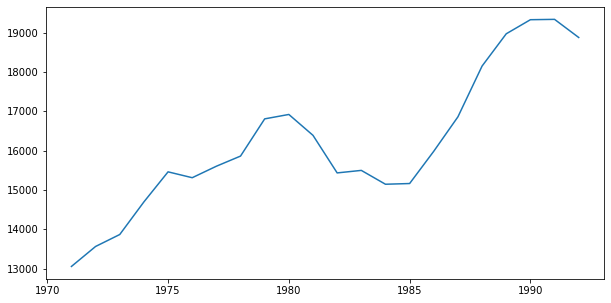

In [4]:
from pyFTS.data import Enrollments

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,5])

df = Enrollments.get_dataframe()
plot(df['Year'],df['Enrollments'])

data = df['Enrollments'].values

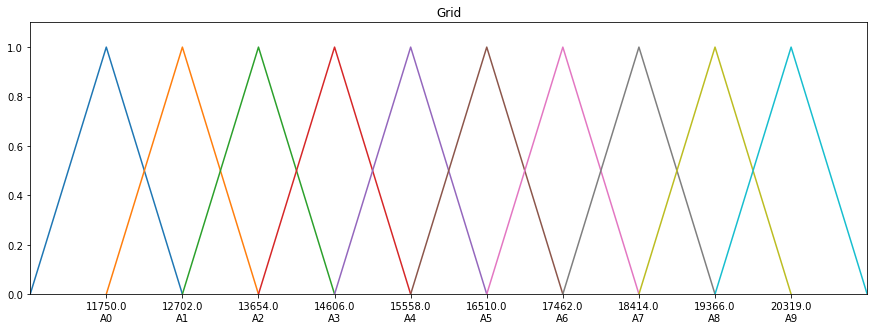

In [5]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

In [6]:
fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')

fuzzyfied

['A1',
 'A2',
 'A2',
 'A3',
 'A4',
 'A4',
 'A4',
 'A4',
 'A5',
 'A5',
 'A5',
 'A4',
 'A4',
 'A4',
 'A4',
 'A4',
 'A5',
 'A7',
 'A8',
 'A8',
 'A8',
 'A7']

In [7]:
from pyFTS.common import FLR

patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A1 -> A2', 'A2 -> A2', 'A2 -> A3', 'A3 -> A4', 'A4 -> A4', 'A4 -> A5', 'A5 -> A5', 'A5 -> A4', 'A5 -> A7', 'A7 -> A8', 'A8 -> A8', 'A8 -> A7']


In [8]:
from pyFTS.models import chen

model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)
print(model)

ModuleNotFoundError: No module named 'SimpSOM'